In [5]:
# Import libraries necessary for this project
from __future__ import division

import numpy as np
import json, os
import pandas as pd
import scanpy as sc
from tqdm import tqdm

from numpy import arange
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
from matplotlib import rcParams

# setting visualization/logging parameters
pd.set_option('display.max_columns', None)
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_versions()

# Pretty display for notebooks
%matplotlib inline

os.chdir('/home/xuhang/Xuhang/Projects/spTrans/script/')

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.1
anndata             0.7.5
attr                19.3.0
backcall            0.2.0
bottleneck          1.3.2
cairo               1.19.1
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
idna                2.10
igraph              0.9.1
ipykernel           5.3.2
ipython_genutils    0.2.0
jedi                0.17.1
jinja2              2.11.2
joblib              1.0.1
jsonschema          3.2.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.3
llvmlite            0.35.0
louvain             0.7.0
lxml                4.5.2
markupsafe          1.1.1
matplotlib          3.3.2
mpl_toolkits        NA
natsort             7.0.1
nb

  0%|          | 0/1 [00:00<?, ?it/s]Trying to set attribute `.obs` of view, copying.
... storing 'subject' as categorical
... storing 'subject_position' as categorical
... storing 'Maynard' as categorical
... storing 'Martinowich' as categorical
... storing 'layer_guess' as categorical
... storing 'layer_guess_reordered' as categorical
... storing 'layer_guess_reordered_short' as categorical
... storing 'leiden' as categorical
100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


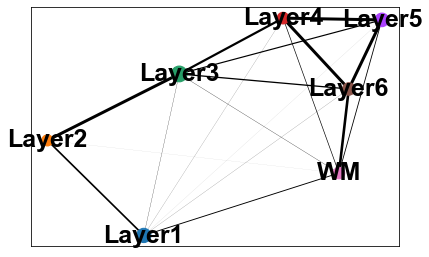

In [6]:
ls_non_match_length = []
# Reading clusters and embedding files
list_samples = ['151507']
for sample in tqdm(list_samples):
    os.makedirs(f'../output/DLPFC/{sample}/PAGA', exist_ok=True)
    df_cluster = pd.read_csv(f'../data/DLPFC/{sample}/metadata.tsv', sep='\t')
    
    # for sed features
    feat = np.load(f'../output/DLPFC/{sample}/SEDR/SED_result.npz')['sed_feat']
    df_feat = pd.DataFrame(feat, 
                           index=df_cluster.index, 
                           columns=['E{}'.format(i) for i in range(0, feat.shape[1])])

    # Convert to adata and assign Embedding values as X_PCA
    adata = sc.AnnData(df_feat)
    adata.obsm['X_pca'] = df_feat.values
    sc.pp.neighbors(adata, n_pcs=len(df_feat.columns)) # n_pcs=30 for seurat pcs
    

    for col in df_cluster.columns:
        adata.obs['{}'.format(col)] = df_cluster['{}'.format(col)].values
    
    target_label = 'layer_guess'
    adata = adata[adata.obs[target_label].notna()]
    
    adata.obs['leiden'] = adata.obs[target_label].astype(str)
    sc.tl.paga(adata)
    sc.pl.paga(adata, fontsize=25, plot=True, show=False, edge_width_scale=0.4)
    plt.savefig(f'../output/DLPFC/{sample}/PAGA/SEDR.PAGA_figure.layer_guess.png')
    plt.savefig(f'../output/DLPFC/{sample}/PAGA/SEDR.PAGA_figure.layer_guess.pdf')
        
    df_paga_edgeWeight = pd.DataFrame(adata.uns['paga']['connectivities'].toarray(), 
                                          columns=sorted(adata.obs['leiden'].unique()),
                                          index=sorted(adata.obs['leiden'].unique()))
        
    df_paga_edgeWeight.to_csv(f'../output/DLPFC/{sample}/PAGA/SEDR.PAGA_wieght.layer_guess.csv')


  0%|          | 0/12 [00:00<?, ?it/s]Trying to set attribute `.obs` of view, copying.
... storing 'subject' as categorical
... storing 'subject_position' as categorical
... storing 'Maynard' as categorical
... storing 'Martinowich' as categorical
... storing 'layer_guess' as categorical
... storing 'layer_guess_reordered' as categorical
... storing 'layer_guess_reordered_short' as categorical
... storing 'leiden' as categorical
  8%|▊         | 1/12 [00:01<00:19,  1.81s/it]Trying to set attribute `.obs` of view, copying.
... storing 'subject' as categorical
... storing 'subject_position' as categorical
... storing 'Maynard' as categorical
... storing 'Martinowich' as categorical
... storing 'layer_guess' as categorical
... storing 'layer_guess_reordered' as categorical
... storing 'layer_guess_reordered_short' as categorical
... storing 'leiden' as categorical
 17%|█▋        | 2/12 [00:02<00:15,  1.60s/it]Trying to set attribute `.obs` of view, copying.
... storing 'subject' as catego

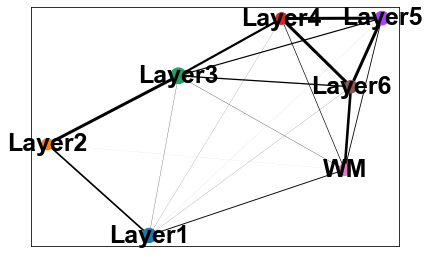

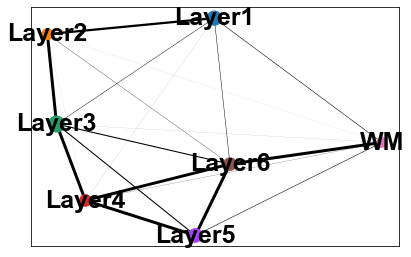

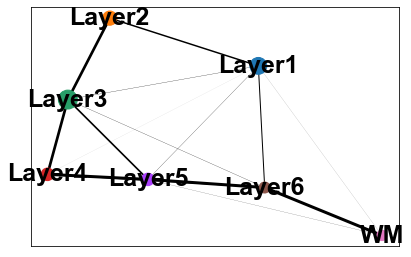

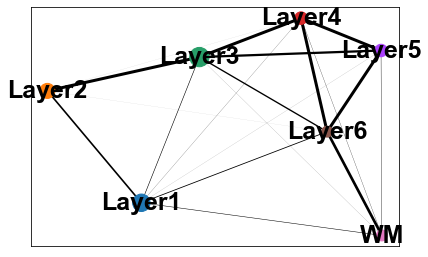

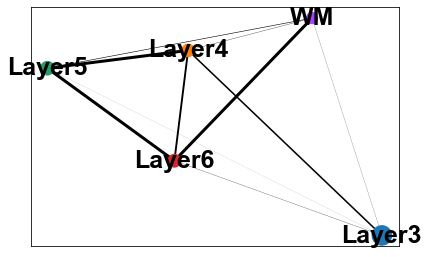

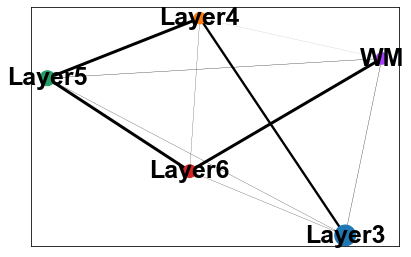

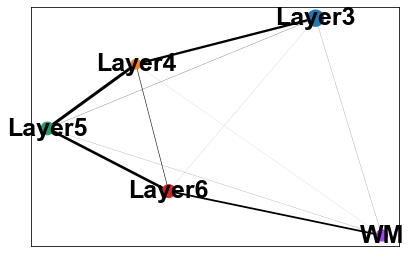

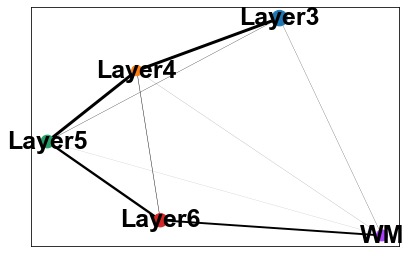

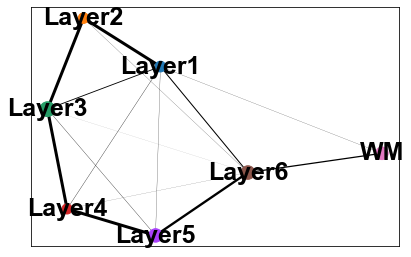

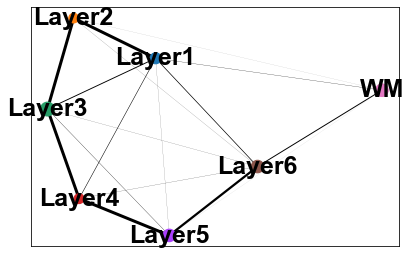

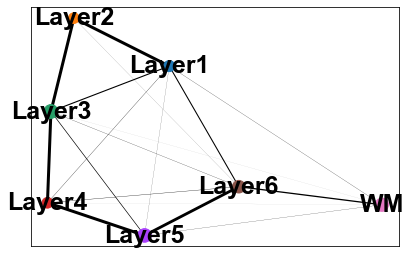

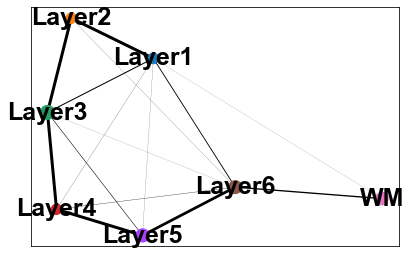

In [7]:
ls_non_match_length = []
# Reading clusters and embedding files
list_samples = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']

for sample in tqdm(list_samples):
    os.makedirs(f'../output/DLPFC/{sample}/PAGA', exist_ok=True)
    df_cluster = pd.read_csv(f'../data/DLPFC/{sample}/metadata.tsv', sep='\t')
    
    # for sed features
    feat = np.load(f'../output/DLPFC/{sample}/SEDR/SED_result.npz')['sed_feat']
    df_feat = pd.DataFrame(feat, 
                           index=df_cluster.index, 
                           columns=['E{}'.format(i) for i in range(0, feat.shape[1])])

    # Convert to adata and assign Embedding values as X_PCA
    adata = sc.AnnData(df_feat)
    adata.obsm['X_pca'] = df_feat.values
    sc.pp.neighbors(adata, n_pcs=len(df_feat.columns)) # n_pcs=30 for seurat pcs
    

    for col in df_cluster.columns:
        adata.obs['{}'.format(col)] = df_cluster['{}'.format(col)].values
    
    target_label = 'layer_guess'
    adata = adata[adata.obs[target_label].notna()]
    
    adata.obs['leiden'] = adata.obs[target_label].astype(str)
    sc.tl.paga(adata)
    sc.pl.paga(adata, fontsize=25, plot=True, show=False, edge_width_scale=0.4)
    plt.savefig(f'../output/DLPFC/{sample}/PAGA/SEDR.PAGA_figure.layer_guess.png')
    plt.savefig(f'../output/DLPFC/{sample}/PAGA/SEDR.PAGA_figure.layer_guess.pdf')
        
    df_paga_edgeWeight = pd.DataFrame(adata.uns['paga']['connectivities'].toarray(), 
                                          columns=sorted(adata.obs['leiden'].unique()),
                                          index=sorted(adata.obs['leiden'].unique()))
        
    df_paga_edgeWeight.to_csv(f'../output/DLPFC/{sample}/PAGA/SEDR.PAGA_wieght.layer_guess.csv')


  0%|          | 0/12 [00:00<?, ?it/s]Trying to set attribute `.obs` of view, copying.
... storing 'subject' as categorical
... storing 'subject_position' as categorical
... storing 'Maynard' as categorical
... storing 'Martinowich' as categorical
... storing 'layer_guess' as categorical
... storing 'layer_guess_reordered' as categorical
... storing 'layer_guess_reordered_short' as categorical
... storing 'leiden' as categorical
  8%|▊         | 1/12 [00:01<00:13,  1.27s/it]Trying to set attribute `.obs` of view, copying.
... storing 'subject' as categorical
... storing 'subject_position' as categorical
... storing 'Maynard' as categorical
... storing 'Martinowich' as categorical
... storing 'layer_guess' as categorical
... storing 'layer_guess_reordered' as categorical
... storing 'layer_guess_reordered_short' as categorical
... storing 'leiden' as categorical
 17%|█▋        | 2/12 [00:02<00:13,  1.36s/it]Trying to set attribute `.obs` of view, copying.
... storing 'subject' as catego

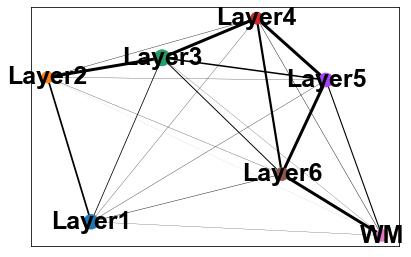

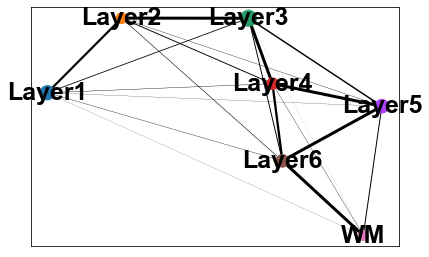

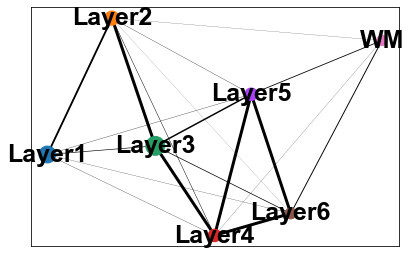

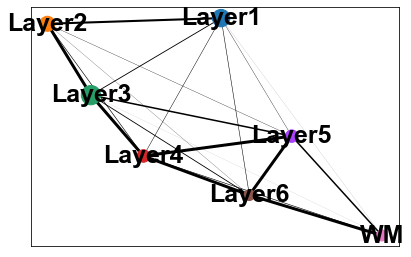

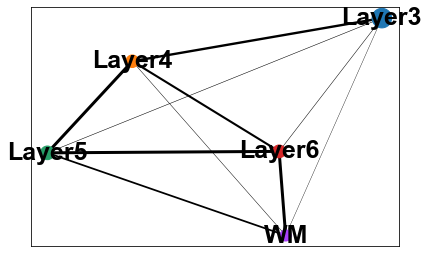

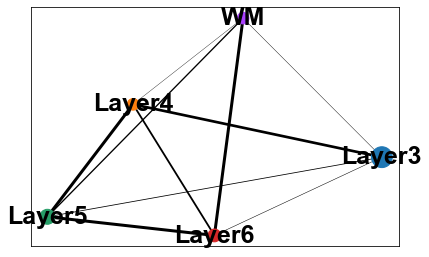

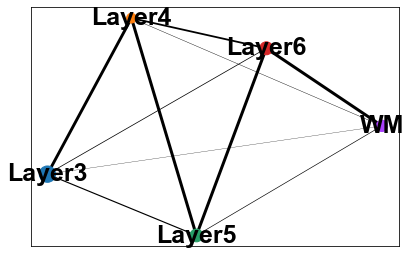

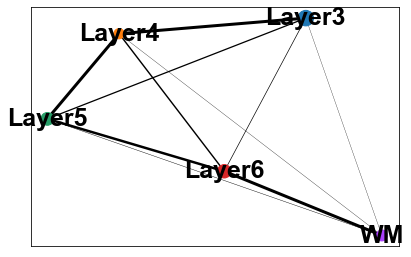

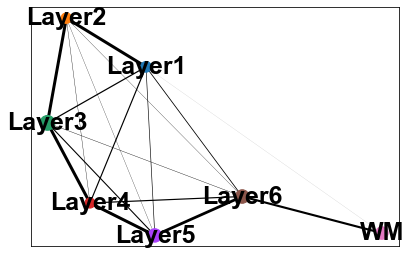

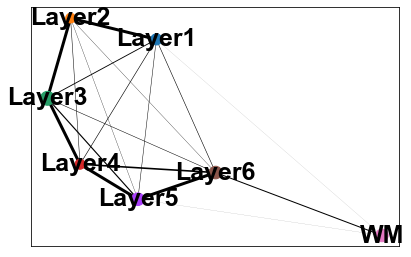

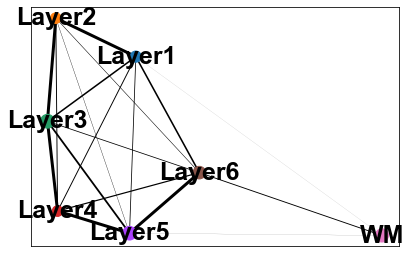

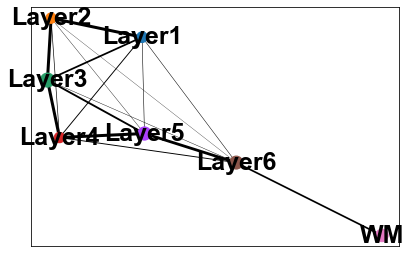

In [8]:
ls_non_match_length = []
# Reading clusters and embedding files
list_samples = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']

for sample in tqdm(list_samples):
    os.makedirs(f'../output/DLPFC/{sample}/PAGA', exist_ok=True)
    df_cluster = pd.read_csv(f'../data/DLPFC/{sample}/metadata.tsv', sep='\t')
    
    # for seurat PCs
    df_feat = pd.read_csv(f'../output/DLPFC/{sample}/Seurat/seurat.PCs.tsv', 
                           index_col=0, sep='\t')

    # Convert to adata and assign Embedding values as X_PCA
    adata = sc.AnnData(df_feat)
    adata.obsm['X_pca'] = df_feat.values
    sc.pp.neighbors(adata, n_pcs=len(df_feat.columns)) # n_pcs=30 for seurat pcs
    

    for col in df_cluster.columns:
        adata.obs['{}'.format(col)] = df_cluster['{}'.format(col)].values
    
    target_label = 'layer_guess'
    adata = adata[adata.obs[target_label].notna()]
    
    adata.obs['leiden'] = adata.obs[target_label].astype(str)
    sc.tl.paga(adata)
    sc.pl.paga(adata, fontsize=25, plot=True, show=False, edge_width_scale=0.4)
    plt.savefig(f'../output/DLPFC/{sample}/PAGA/seurat.PAGA_figure.layer_guess.png')
    plt.savefig(f'../output/DLPFC/{sample}/PAGA/seurat.PAGA_figure.layer_guess.pdf')
        
    df_paga_edgeWeight = pd.DataFrame(adata.uns['paga']['connectivities'].toarray(), 
                                          columns=sorted(adata.obs['leiden'].unique()),
                                          index=sorted(adata.obs['leiden'].unique()))
        
    df_paga_edgeWeight.to_csv(f'../output/DLPFC/{sample}/PAGA/seurat.PAGA_wieght.layer_guess.csv')
